# Lab 3

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 9/17/20

Description: Working with the adult dataset and starting some real data visualization

In [1]:
import pandas as pd # Pandas library
import numpy as np # Numpy library
import matplotlib.pyplot as plt # Matplotlib library for plotting

In [2]:
# Parse the file
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_data[['occupation', 'income']].head() # Printing the data of occupation and income

,occupation,income
0,Adm-clerical,<=50K
1,Exec-managerial,<=50K
2,Handlers-cleaners,<=50K
3,Handlers-cleaners,<=50K
4,Prof-specialty,<=50K


In [4]:
# 3.a Rank the data in terms of most likely to make the most money
# Select what columns I want first
tmp = adult_data[['occupation', 'income']]
# Sort the data by occupations that make more than 50k and then group by their occupation and count the amount, sort their incomes in descending order
tmp[tmp['income'] == ">50K"].groupby(by='occupation').count().sort_values(by='income', ascending=False)

,income
occupation,
Exec-managerial,1968
Prof-specialty,1859
Sales,983
Craft-repair,929
Adm-clerical,507
Transport-moving,320
Tech-support,283
Machine-op-inspct,250
Protective-serv,211


In [5]:
# 3.b
tmp = adult_data[['age', 'sex', 'income']]
# The median age for people that make more than 50K
print('The median age for people that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'age'].median())
# The median age for people that make less than 50K
print('The median age for people that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'age'].median())
# The median age for people (split by men and women) that make more than 50K
print('The median age for men that make more than 50K')
sub_tmp = tmp[tmp['income'] == ">50K"]
print(sub_tmp[sub_tmp['sex'] == "Male"].loc[:,'age'].median())
print('The median age for women that make more than 50K')
print(sub_tmp[sub_tmp['sex'] == "Female"].loc[:,'age'].median())
# The median age for people (split by men and women) that make less than 50K
print('The median age for men that make less than 50K')
sub_tmp = tmp[tmp['income'] == "<=50K"]
print(sub_tmp[sub_tmp['sex'] == "Male"].loc[:,'age'].median())
print('The median age for women that make less than 50K')
print(sub_tmp[sub_tmp['sex'] == "Female"].loc[:,'age'].median())

The median age for people that make more than 50K
44.0
The median age for people that make less than 50K
34.0
The median age for men that make more than 50K
44.0
The median age for women that make more than 50K
41.0
The median age for men that make less than 50K
35.0
The median age for women that make less than 50K
34.0


In [6]:
# 3.c
tmp = adult_data[['education-num', 'income']]
# The mean and median number of years of education for adults that make more than 50K
print('The mean number of years of education for adults that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'education-num'].mean())
print('The median number of years of education for adults that make more than 50K')
print(tmp[tmp['income'] == ">50K"].loc[:,'education-num'].median())
# The mean and median number of years of education for adults that make less than 50K
print('The mean number of years of education for adults that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'education-num'].mean())
print('The median number of years of education for adults that make less than 50K')
print(tmp[tmp['income'] == "<=50K"].loc[:,'education-num'].median())

The mean number of years of education for adults that make more than 50K
11.6116566764
The median number of years of education for adults that make more than 50K
12.0
The mean number of years of education for adults that make less than 50K
9.59506472492
The median number of years of education for adults that make less than 50K
9.0


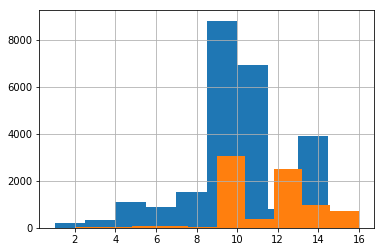

In [7]:
# 3.d 
# Plotting a histogram to see the distribution of years of education held by adults who make more and less than 50K
tmp = adult_data[['education-num', 'income']]
moreThan = tmp[tmp['income'] == ">50K"]
lessThan = tmp[tmp['income'] == "<=50K"]
lessThan['education-num'].hist() # blue
moreThan['education-num'].hist() # orange

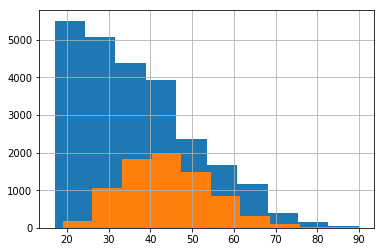

In [8]:
# 3.e
# Plotting a histogram to see the distribution of ages of adults who make more and less than 50K
tmp = adult_data[['age', 'income']]
moreThan = tmp[tmp['income'] == ">50K"]
lessThan = tmp[tmp['income'] == "<=50K"]
lessThan['age'].hist() # blue
moreThan['age'].hist() # orange

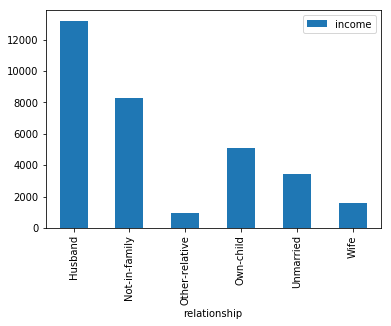

In [9]:
# 4.a
# Plotting a bar plot that shows a trend within a variable that does not have inter-relationship
# Count of adults at various relationships statuses
marital_status_data = adult_data[['relationship', 'income']]
marital_status_count = marital_status_data.groupby(by='relationship').count()
marital_status_count.plot.bar()

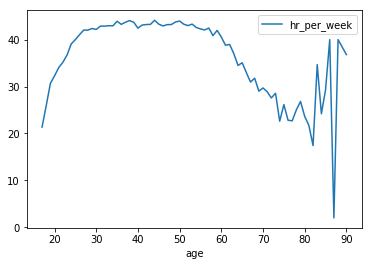

In [10]:
# 4.b
# Plotting a line plot where the x-axis variable manifests fully across the plot domain
line_data = adult_data[['age', 'hr_per_week']]
line_data.groupby(by='age').mean().plot.line()

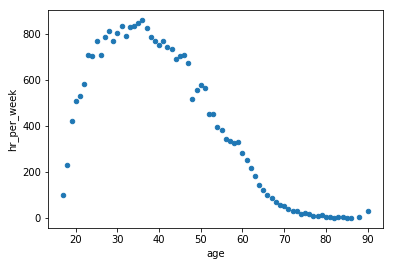

In [11]:
# 4.c
# Plotting a scatter plot of the data that suggests a relationship between two discrete variables
# where the x-axis has an inter-related progression
scatter_data = adult_data[['age', 'hr_per_week']]
# Number of people that work more than 25 hours a week as age increases
scatter_data[scatter_data['hr_per_week'] > 25].groupby(by='age').count().reset_index().plot.scatter(x='age', y='hr_per_week')

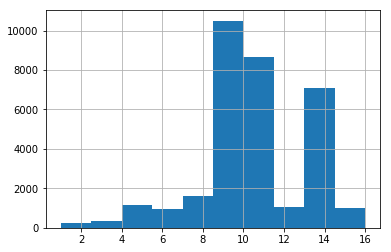

In [104]:
# 4.d
# Plotting a histogram of a quantity that varies across the x-axis domain, but where we would like to
# consider a general distribution
ed_data = adult_data[['education-num', 'hr_per_week']]
ed_data['education-num'].hist()

# What is the relationship between between gender and whether a person makes more than $50k?

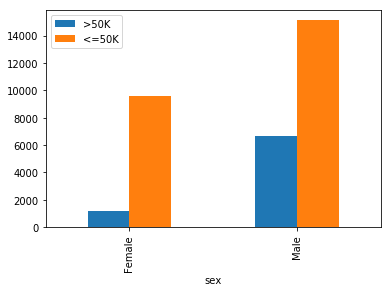

In [13]:
# 5.a
# What is the relationship between between gender and whether a person makes more than $50k?
gender_pay = adult_data[['sex', 'income']]
more = gender_pay[gender_pay['income'] == '>50K'].groupby(by='sex').count()
less = gender_pay[gender_pay['income'] == '<=50K'].groupby(by='sex').count()
more.rename(columns={'income': '>50K'}, inplace=True)
less.rename(columns={'income': '<=50K'}, inplace=True)
combined = pd.concat((more, less), axis=1)
combined.plot.bar()

The relationship between the gender and whether a person makes more than 50K or not is that, according to the data set,
there are a lot more men that make more than 50K than women. There is also a lot more men that make less than 50K then women. This is because
there is a big difference in the amount of men compared to the amount of women so the value can be skewed. Generally, the scaling is pretty
accurate to support both of these claims. It would seem that men tend to make more than women.

# When a person makes more than $50K, what is the relationship between gender and occupation? What about for less?

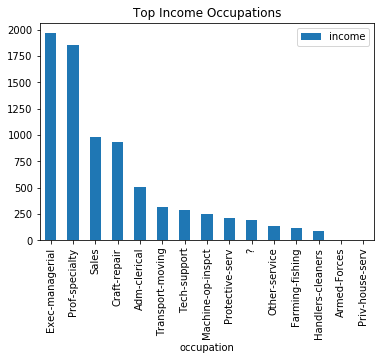

In [14]:
# 5.b
# When a person makes more than $50K, what is the relationship between gender and occupation? What about for less?
occ_data = adult_data[['occupation', 'income']]
occ_plot = occ_data[occ_data['income'] == ">50K"].groupby(by='occupation').count().sort_values(by='income', ascending=False)
occ_plot.plot.bar(title='Top Income Occupations')

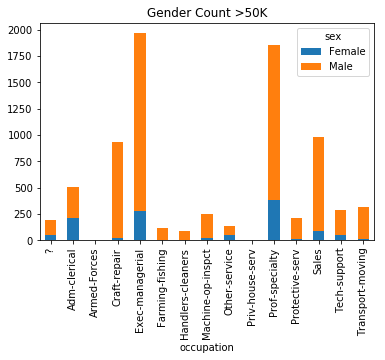

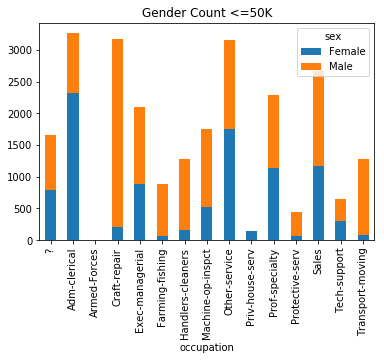

In [15]:
gend_occ_data = adult_data[['occupation', 'sex', 'income']]
more = gend_occ_data[gend_occ_data['income'] == '>50K'].groupby(['occupation', 'sex']).count()
less = gend_occ_data[gend_occ_data['income'] == '<=50K'].groupby(['occupation', 'sex']).count()
plot_data = more.reset_index()
plot_data = plot_data.pivot(index='occupation', columns='sex', values='income')
plot_data.plot.bar(title='Gender Count >50K', stacked=True)
plot_data = less.reset_index()
plot_data = plot_data.pivot(index='occupation', columns='sex', values='income')
plot_data.plot.bar(title='Gender Count <=50K', stacked=True)

From the first graph, you can see the highest paid occupations in the data set. Not every occupation is shown in that graph, meaning that the 
rest of the occupations (occupations with "0") do not have a person within that job with a recorded income above 50K. The second and third graph are representing male and female counts recorded for each job, one graph for >50K and the other for <=50K. What we can see is that when a person makes more than 50K, men tend to make more than women because they tend to work in higher paying jobs as shown in the first graph. When
a person makes less thatn 50K, both men and women are fairly even on their pay scale. This is also due to the fact that men seem to dominate the higher paying jobs in the data set. Overall, men make more than women because of the income of the occupation they tend to have.

# What are the “richest” professions in each possible native country?

In [41]:
# 5.c
# What are the “richest” professions in each possible native country?
country_data = adult_data[['occupation', 'country', 'income']]
country_data = country_data[country_data['income'] == '>50K']
plot_data = country_data.groupby(['country', 'occupation']).count()
plot_data = plot_data.reset_index()
plot_data = plot_data.groupby(by='country').max()
print(plot_data)

                           occupation  income
country                                      
?                    Transport-moving      48
Cambodia                        Sales       2
Canada               Transport-moving       8
China                    Tech-support      11
Columbia                 Tech-support       1
Cuba                 Transport-moving       7
Dominican-Republic              Sales       1
Ecuador              Transport-moving       1
El-Salvador                     Sales       3
England                  Tech-support      10
France                   Tech-support       5
Germany              Transport-moving      15
Greece                 Prof-specialty       6
Guatemala                Tech-support       2
Haiti                  Prof-specialty       2
Honduras               Prof-specialty       1
Hong                  Protective-serv       3
Hungary              Transport-moving       1
India                Transport-moving      25
Iran                            Sa

Based off this table, we can see the profession from each country that has the most amount of people that make more than 50K. This is the best
we can do in finding the "richest" professions because we are given no more data other than if people make more or less than 50K. This does,
however, give us a pretty good estimate of what professions are doing the "best" in each country.

# What is the relationship between race and level of education? Does it further seem to relate to whether a person makes more than $50k?

In [65]:
# 5.d
# What is the relationship between race and level of education? Does it further seem to relate to whether a person makes more than $50k?
race_data = adult_data[['education-num', 'race', 'income']]
plot_race_ed = race_data[['education-num', 'race']]
print('Average Education-num per Race')
plot_race_ed.groupby(by='race').mean().sort_values(by='education-num', ascending=False)

Average Education-num per Race


,education-num
race,
Asian-Pac-Islander,10.960539
White,10.135246
Black,9.486236
Amer-Indian-Eskimo,9.311897
Other,8.841328


In [66]:
plot_race_inc = race_data[['race', 'income']]
print('Race Count >50K')
plot_race_inc[plot_race_inc['income'] == '>50K'].groupby(by='race').count().sort_values(by='income', ascending=False)

Race Count >50K


,income
race,
White,7117
Black,387
Asian-Pac-Islander,276
Amer-Indian-Eskimo,36
Other,25


In [67]:
print('Race count <=50K')
plot_race_inc[plot_race_inc['income'] == '<=50K'].groupby(by='race').count().sort_values(by='income', ascending=False)

Race count <=50K


,income
race,
White,20699
Black,2737
Asian-Pac-Islander,763
Amer-Indian-Eskimo,275
Other,246


The relationship between race and education is that there are some races that actualy average a higher amount of years of education than 
others. This can be seen in the first table where we see that Asian and White seem to average 2-3 years more than races not specified and about 
1-2 years more than Black and Indian. This statistic does translate to the amount of people makeing more and less than 50K per race. From the
second table, you can see that White people have the most amount that make more than 50K. This would make sense because they have the second highest average education-num. One minor issue is that White people also have the most people that make less than 50K by a substantial margin. I believe that there are not enough data points to make a very strong conclusion on every race because there are so many White compared to all the other recorded races. Nonetheless, the trend does seem to be that the more years of education you have, the more money you tend to make.